# Supervised Discretization
## Discretisation with Decision Trees consists of using a decision tree to identify the optimal splitting points that would determine the bins or contiguous intervals:

## Step 1: 

## First it trains a decision tree of limited depth (2, 3 or 4) using the variable we want to discretize to predict the target. 

## Step 2: 

## The original variable values are then replaced by the probability returned by the tree. 

## The probability is the same for all the observations within a single bin, thus replacing by the probability is equivalent to grouping the observations within the cut-off decided by the decision tree.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.DataFrame(pd.read_csv("./train.csv",usecols =['Age','Fare','Survived']))
data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
data.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
mean = data.Age.mean()
data.Age.fillna(mean,inplace=True)

In [5]:
data = data.astype("int")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare', 'Survived']],data.Survived , test_size = 0.3)

In [8]:
X_train.head()

,Age,Fare,Survived
664,20,7,1
383,35,52,1
220,16,8,1
401,26,8,0
654,18,6,0


In [9]:
y_train.head()

664    1
383    1
220    1
401    0
654    0
Name: Survived, dtype: int64

In [10]:
tree_model = DecisionTreeClassifier(max_depth=2)

In [11]:
X_train.Age.to_frame().head()

,Age
664,20
383,35
220,16
401,26
654,18


In [12]:
X_train.Survived.head()

664    1
383    1
220    1
401    0
654    0
Name: Survived, dtype: int64

In [13]:
tree_model.fit(X_train.Age.to_frame(), X_train.Survived)

DecisionTreeClassifier(max_depth=2)

In [14]:
tree_model.predict_proba(X_train.Age.to_frame())

array([[0.63194444, 0.36805556],
       [0.63194444, 0.36805556],
       [0.63194444, 0.36805556],
       ...,
       [0.63194444, 0.36805556],
       [0.63194444, 0.36805556],
       [0.63194444, 0.36805556]])

In [15]:
X_train['Age_tree']=tree_model.predict_proba(X_train.Age.to_frame())[:,1] 

In [16]:
X_train.tail(10)

,Age,Fare,Survived,Age_tree
254,41,20,0,0.368056
800,34,13,0,0.368056
815,29,0,0,0.368056
286,30,9,1,0.368056
565,24,24,0,0.368056
746,16,20,0,0.368056
554,22,7,1,0.368056
263,40,0,0,0.368056
101,29,7,0,0.368056
215,31,113,1,0.368056


In [17]:
X_train.Age_tree.unique()

array([0.36805556, 0.53333333, 0.81818182, 0.        ])

# plot graph


Text(0, 0.5, 'Survived')

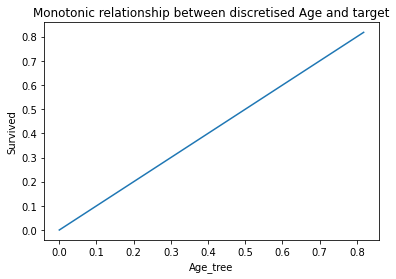

In [18]:
fig = plt.figure()
fig = X_train.groupby(['Age_tree'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between discretised Age and target')
fig.set_ylabel('Survived')

<AxesSubplot:xlabel='Age_tree'>

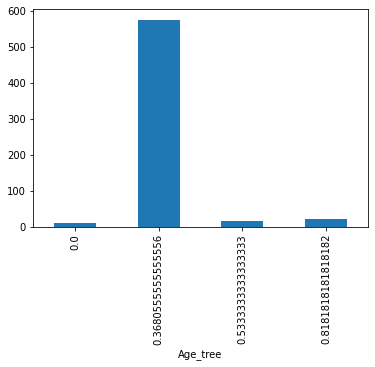

In [19]:
X_train.groupby(['Age_tree'])['Survived'].count().plot.bar()

In [20]:
pd.concat( [X_train.groupby(['Age_tree'])['Age'].min(),
            X_train.groupby(['Age_tree'])['Age'].max()], axis=1)

,Age,Age
Age_tree,,
0.000000,64,74
0.368056,7,63
0.533333,0,2
0.818182,3,6
